In [1]:
import sys
sys.path.append('..')
from QNN_MNIST import MNIST_QNN
from matplotlib import pyplot as plt
from mindspore.train import Accuracy, Model, LossMonitor    
import mindspore as ms

/opt/miniconda3/envs/MindSpore/lib/python3.9/site-packages/mindquantum/simulator/__init__.py:17: UserWarning: Unable import mqvector gpu backend due to: cannot import name '_mq_vector_gpu' from partially initialized module 'mindquantum' (most likely due to a circular import) (/opt/miniconda3/envs/MindSpore/lib/python3.9/site-packages/mindquantum/__init__.py)
  from .available_simulator import SUPPORTED_SIMULATOR


In [2]:
qnn = MNIST_QNN(zoom_factor=0.4,hea_reps=2) #大约40秒

正在进行数据预处理...稍等
训练、测试数据集初始化完成!shape=(1927, 11, 11)


看一下投入训练的数据：

In [5]:
qnn._X_train[0].shape
#由于从(28,28)->(11,11) 可以只使用6个量子比特

(11, 11)

数据标签是=1,shape=(11, 11)


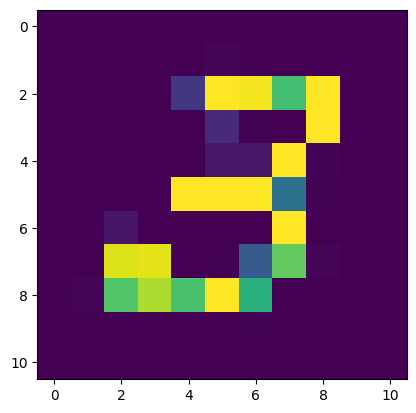

In [4]:
index=12
plt.imshow(qnn._X_train[index])
print(f'数据标签是={qnn._y_train[index]},shape={qnn._X_train[index].shape}')
#1-代表3 0-代表6

正式训练...

In [6]:
class StepAcc(ms.Callback):                                                      # 定义一个关于每一步准确率的回调函数
    def __init__(self, model, test_loader):
        self.model = model
        self.test_loader = test_loader
        self.acc = []

    def on_train_step_end(self, run_context):
        self.acc.append(self.model.eval(self.test_loader, dataset_sink_mode=False)['Acc'])    
                


mnist_qnn = qnn
monitor = LossMonitor(20)                                                      
acc = StepAcc(mnist_qnn.model, mnist_qnn.test_loader)  
mnist_qnn.model.train(10, mnist_qnn.train_loader, callbacks=[monitor, acc], dataset_sink_mode=False)

epoch: 1 step: 20, loss is 0.5915220975875854
epoch: 1 step: 40, loss is 0.6694342494010925
epoch: 1 step: 60, loss is 0.715988278388977


KeyboardInterrupt: 

In [ ]:
plt.plot(acc.acc)
plt.title('Statistics of accuracy', fontsize=20)
plt.xlabel('Steps', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)